In [1]:
#importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading test image
train_img = cv2.imread('./lenatrain.jpg')

#reading train image
test_img = cv2.imread('./lenatest.jpg')

In [3]:
#function to plot signed 32bit signed matrix images side by side
def plot_32bs_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15, 15])
    axis1 = fig.add_subplot(121)
    axis1.imshow(cv2.cvtColor(img1, cv2.CV_32S))
    axis1.set(title=title1)
    axis2 = fig.add_subplot(122)
    axis2.imshow(cv2.cvtColor(img2, cv2.CV_32S))
    axis2.set(title=title2)


#function to plot gray images side by side
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15, 15])
    axis1 = fig.add_subplot(121)
    axis1.imshow(img1, cmap="gray")
    axis1.set(title=title1)
    axis2 = fig.add_subplot(122)
    axis2.imshow(img2, cmap="gray")
    axis2.set(title=title2)

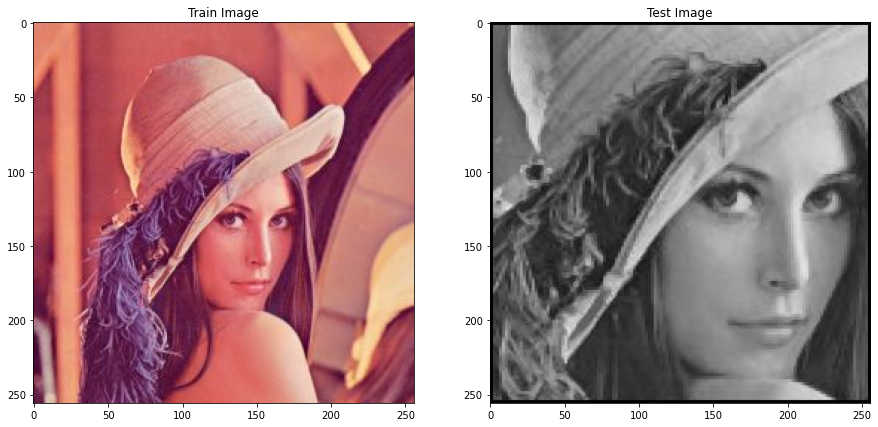

In [4]:

# Show Original Images 
plot_32bs_images(train_img, test_img, "Train Image", "Test Image")

In [5]:
# changing Images to grayscale
train_gray_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
test_gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

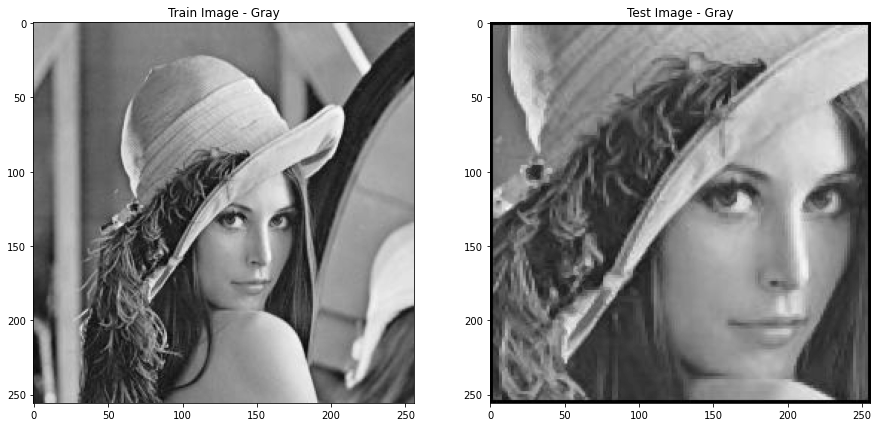

In [6]:
#plot grayscale images
plot_images(train_gray_img, test_gray_img, 'Train Image - Gray', 'Test Image - Gray')

In [7]:
# Initialise Open CV SIFT detector
sift = cv2.SIFT_create()

In [8]:
#function to get keypoints and descriptors
def get_KP_DESC(img):
    return sift.detectAndCompute(img, None)

In [9]:
# Generate SIFT keypoints and descriptors
train_kp, train_desc = get_KP_DESC(train_gray_img)
test_kp, test_desc = get_KP_DESC(test_gray_img)

In [10]:
#function to draw keypoints on image
def draw_KP(gray_img_1, kp1, orig_img_1, title1, gray_img_2, kp2, orig_img_2, title2):
    img1 = cv2.drawKeypoints(gray_img_1, kp1, orig_img_1.copy())
    img2 = cv2.drawKeypoints(gray_img_2, kp2, orig_img_2.copy()) 
    fig = plt.figure(figsize=[15, 15])
    axis1 = fig.add_subplot(121)
    axis1.imshow(img1)
    axis1.set(title=title1)
    axis2 = fig.add_subplot(122)
    axis2.imshow(img2)
    axis2.set(title=title2)

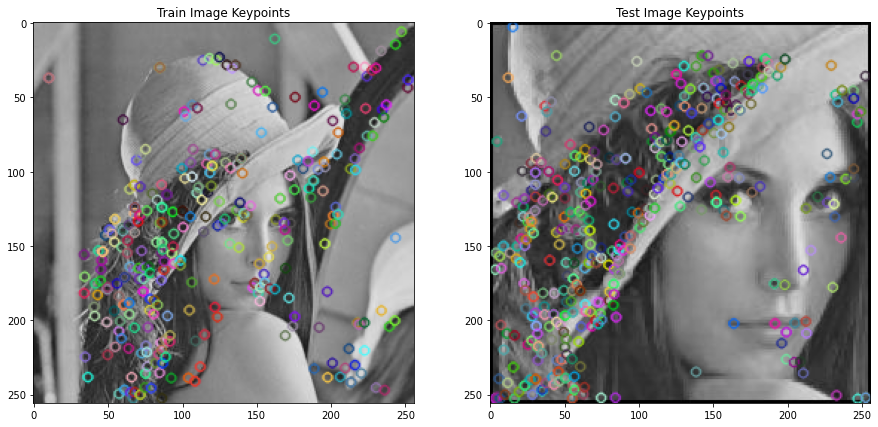

In [11]:
#draw detected keypoints on images
draw_KP(train_gray_img, train_kp, train_img, 'Train Image Keypoints', test_gray_img, test_kp, test_img, 'Test Image Keypoints')

In [12]:
# create a Brute Force Matcher object which will match the SIFT features
brute_force = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = brute_force.match(train_desc, test_desc)

In [13]:
# Sort the matches in the order of their distance in ascending order.
matches = sorted(matches, key = lambda x:x.distance)

In [16]:
# draw the top N matches
N_MATCHES = 20

matched_img = cv2.drawMatches(train_img, train_kp, test_img, test_kp, matches[:N_MATCHES], test_img.copy(), flags=0)

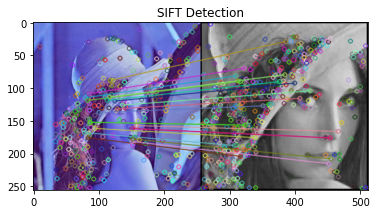

In [17]:
#Plotting matched image
plt.figure()
plt.imshow(matched_img)
plt.title('SIFT Detection')
plt.show()